In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

2024-07-10 07:37:14.557894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-10 07:37:14.558023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-10 07:37:14.663620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/30


I0000 00:00:1720597144.378283      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


281/281 ━━━━━━━━━━━━━━━━━━━━ 243s 528ms/step - accuracy: 0.6064 - loss: 4.4915 - val_accuracy: 0.0484 - val_loss: 32.8166
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 513ms/step - accuracy: 0.8022 - loss: 0.7633 - val_accuracy: 0.2072 - val_loss: 1.9463
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 493ms/step - accuracy: 0.8273 - loss: 0.6544 - val_accuracy: 0.6856 - val_loss: 1.2791
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 138s 491ms/step - accuracy: 0.8514 - loss: 0.5578 - val_accuracy: 0.7866 - val_loss: 0.8042
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 191s 682ms/step - accuracy: 0.8681 - loss: 0.5047 - val_accuracy: 0.8041 - val_loss: 0.7613
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 137s 487ms/step - accuracy: 0.8839 - loss: 0.4379 - val_accuracy: 0.7928 - val_loss: 0.7075
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 132s 473ms/step - accuracy: 0.8913 - loss: 0.4324 - val_accuracy: 0.6938 - val_loss: 0.9761
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 136s 484ms/step - accuracy: 0.8949 - loss: 0.4

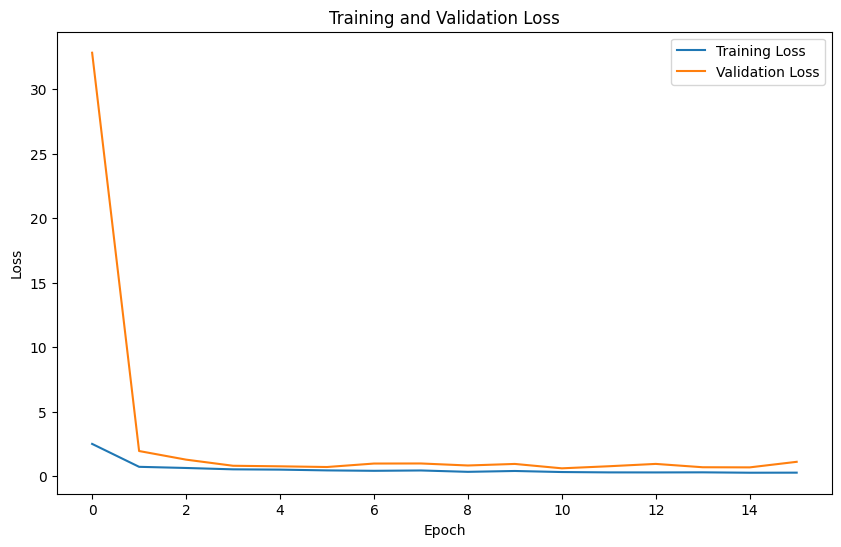

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


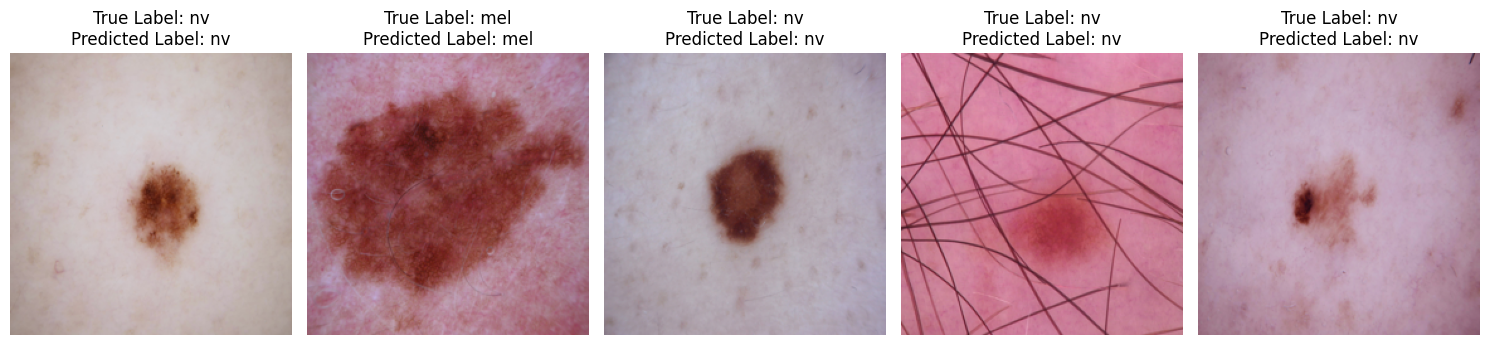

In [2]:
import pandas as pd
import os
from PIL import Image
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load metadata
metadata = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

image_dir1 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_dir2 = '/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

# Create a dictionary for image paths
image_paths = [os.path.join(image_dir1, fname) for fname in os.listdir(image_dir1)]
image_paths += [os.path.join(image_dir2, fname) for fname in os.listdir(image_dir2)]
image_path_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths}
metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Map labels to IDs
label_to_id = {label: idx for idx, label in enumerate(metadata['dx'].unique())}

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    try:
        image = Image.open(image_path).convert('RGB')  # Ensure RGB format
        image = image.resize((224, 224))
        image = np.array(image) / 255.0
        return image.astype(np.float32)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augmented data generator with oversampling
def augmented_data_generator(metadata, label_to_id, batch_size=32):
    counter = Counter(metadata['dx'])
    max_count = max(counter.values())
    balanced_metadata = pd.concat(
        [metadata[metadata['dx'] == label].sample(max_count, replace=True, random_state=42) for label in counter.keys()]
    ).sample(frac=1, random_state=42)
    num_samples = len(balanced_metadata)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = balanced_metadata.iloc[offset:offset+batch_size]
            images = []
            labels = []
            with ThreadPoolExecutor() as executor:
                future_to_image = {executor.submit(load_and_preprocess_image, row['image_path']): row for _, row in batch_samples.iterrows()}
                for future in as_completed(future_to_image):
                    row = future_to_image[future]
                    image = future.result()
                    if image is not None:
                        images.append(image)
                        labels.append(label_to_id[row['dx']])
            images = np.array(images)
            labels = np.array(labels)
            augmented_images = np.array([datagen.random_transform(image) for image in images])
            yield augmented_images, labels

# Data generator for validation
def data_generator(metadata, label_to_id, batch_size=32):
    num_samples = len(metadata)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = metadata.iloc[offset:offset+batch_size]
            images = []
            labels = []
            with ThreadPoolExecutor() as executor:
                future_to_image = {executor.submit(load_and_preprocess_image, row['image_path']): row for _, row in batch_samples.iterrows()}
                for future in as_completed(future_to_image):
                    row = future_to_image[future]
                    image = future.result()
                    if image is not None:
                        images.append(image)
                        labels.append(label_to_id[row['dx']])
            yield np.array(images), np.array(labels)

# Split the metadata into training and validation sets
train_metadata, val_metadata = train_test_split(metadata, test_size=0.1, stratify=metadata['dx'], random_state=42)

# Define EfficientNet model with transfer learning, L2 regularization, and dropout
def EfficientNetModel(input_shape, num_classes):
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape, weights='imagenet')  # Use pre-trained weights
    l2_reg = tf.keras.regularizers.l2(0.01)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.6)(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2_reg)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=outputs, name='EfficientNetWithL2Dropout')
    return model

input_shape = (224, 224, 3)
num_classes = len(label_to_id)
model = EfficientNetModel(input_shape, num_classes)

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True
)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training and validation generators
train_gen = augmented_data_generator(train_metadata, label_to_id)
val_gen = data_generator(val_metadata, label_to_id)

# Training configuration
steps_per_epoch = len(train_metadata) // 32
validation_steps = len(val_metadata) // 32

# Callbacks
callbacks = [
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras', save_best_only=True),
    TensorBoard(log_dir='./logs'),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_gen,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_gen,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Plot training and validation loss curves
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

id_to_label = {idx: label for label, idx in label_to_id.items()}

# Function to predict and display images with true and predicted labels
def predict_and_display_images(model, metadata, image_paths, id_to_label):
    plt.figure(figsize=(15, 10))
    num_images = len(image_paths)
    for i, image_path in enumerate(image_paths, 1):
        plt.subplot(1, num_images, i)
        image = load_and_preprocess_image(image_path)
        if image is not None:
            image_batch = np.expand_dims(image, axis=0)
            prediction = model.predict(image_batch)
            predicted_label = id_to_label[np.argmax(prediction)]
            true_label = metadata[metadata['image_path'] == image_path]['dx'].values[0]
            plt.imshow(image)
            plt.title(f'True Label: {true_label}\nPredicted Label: {predicted_label}')
            plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage: Get paths of multiple images from the validation set
example_image_paths = val_metadata.iloc[:5]['image_path'].tolist()  # Get paths of first 5 images from validation set

# Example usage: Predict and display multiple images with labels
predict_and_display_images(model, val_metadata, example_image_paths, id_to_label)
model.save('path_to_your_trained_model.h5')  # Save the model to a file
